<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/costa_rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
install.packages("ggalluvial")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lazyeval’




In [5]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)
library(ggalluvial)

In [6]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=230858d7dff9ae6eb1f7c1ba9484418e&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbXVhT044b0hodkduY0Y5V1Y0ZUc3VWFNc1NkbEtPNUkzZnVOTVllVTVlZl9BbkV0aEFWcy02MmNBUWJRdjZKdyIsInN0YXRlIjoiMjMwODU4ZDdkZmY5YWU2ZWIxZjdjMWJhOTQ4NDQxOGUifQ==


In [15]:
# https://drive.google.com/file/d/1-2KmYPE9xX1Qw4fezrPmNGN1Ct7LQmv9/view?usp=drive_link
drive_download(file = as_id('1-2KmYPE9xX1Qw4fezrPmNGN1Ct7LQmv9'), path =  '/content/limon_21_23.tif', overwrite = TRUE)
limon_21_23_tif <- stack('/content/limon_21_23.tif')

In [10]:
# https://drive.google.com/file/d/1--dHdDEepv7Hs3cFT3j1Faqi-jAezIyE/view?usp=sharing
drive_download(file = as_id('1--dHdDEepv7Hs3cFT3j1Faqi-jAezIyE'), path =  '/content/limon_15_17.tif', overwrite = TRUE)
limon_15_17_tif <- stack('/content/limon_15_17.tif')

In [18]:
# https://drive.google.com/file/d/1gvkgN08c35R2iTeIcFSo1CuqeboGs_T7/view?usp=sharing

drive_download(file = as_id('1gvkgN08c35R2iTeIcFSo1CuqeboGs_T7'), path =  '/content/limon.gpkg', overwrite = TRUE)
limon_gpgk <- st_read('/content/limon.gpkg') %>% st_transform(st_crs(limon_21_23_tif))
region_gpkg <- st_read(')

File downloaded:

• limon.gpkg <id: 1gvkgN08c35R2iTeIcFSo1CuqeboGs_T7>

Saved locally as:

• /content/limon.gpkg



Reading layer `limon' from data source `/content/limon.gpkg' using driver `GPKG'
Simple feature collection with 1 feature and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -83.94696 ymin: 9.07481 xmax: -82.55271 ymax: 10.93904
Geodetic CRS:  WGS 84


File downloaded:

• region.gpkg <id: 1NY00I4o3YiJj3kCz9XYdIeJ2ihuSJsEf>

Saved locally as:

• /content/region.gpkg



Multiple layers are present in data source /content/region.gpkg, reading layer `doc__japdevakmz'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“automatically selected the first layer in a data source containing more than one.”


Reading layer `doc__japdevakmz' from data source `/content/region.gpkg' using driver `GPKG'
Simple feature collection with 1 feature and 11 fields
Geometry type: LINESTRING
Dimension:     XYZ
Bounding box:  xmin: -83.92922 ymin: 9.990194 xmax: -83.07541 ymax: 10.93744
z_range:       zmin: 0 zmax: 0
Geodetic CRS:  WGS 84


In [135]:
# https://drive.google.com/file/d/1NY00I4o3YiJj3kCz9XYdIeJ2ihuSJsEf/view?usp=drive_link
drive_download(file = as_id('1NY00I4o3YiJj3kCz9XYdIeJ2ihuSJsEf'), path =  '/content/region.gpkg', overwrite = TRUE)
region_gpkg <- st_read('/content/region.gpkg') %>% st_transform(st_crs(limon_21_23_tif))
coords <- region_gpkg %>% st_coordinates
# coords
region_gpkg <- st_polygon(list(rbind(coords,coords[1,]) %>% as.matrix)) %>% st_sfc(crs=st_crs(region_gpkg)) %>% st_zm() %>% st_buffer(0)

File downloaded:

• region.gpkg <id: 1NY00I4o3YiJj3kCz9XYdIeJ2ihuSJsEf>

Saved locally as:

• /content/region.gpkg



Multiple layers are present in data source /content/region.gpkg, reading layer `doc__japdevakmz'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“automatically selected the first layer in a data source containing more than one.”


Reading layer `doc__japdevakmz' from data source `/content/region.gpkg' using driver `GPKG'
Simple feature collection with 1 feature and 11 fields
Geometry type: LINESTRING
Dimension:     XYZ
Bounding box:  xmin: -83.92922 ymin: 9.990194 xmax: -83.07541 ymax: 10.93744
z_range:       zmin: 0 zmax: 0
Geodetic CRS:  WGS 84


In [20]:
# https://drive.google.com/file/d/1WfxuulrDTpfL_rEUQAnDi9ogOsfNY7db/view?usp=drive_link
drive_download(file = as_id('1WfxuulrDTpfL_rEUQAnDi9ogOsfNY7db'), path =  '/content/park.gpkg', overwrite = FALSE)
park_gpgk <- st_read('/content/park.gpkg') %>% st_transform(st_crs(limon_22_23_tif))

File downloaded:

• park.gpkg <id: 1WfxuulrDTpfL_rEUQAnDi9ogOsfNY7db>

Saved locally as:

• /content/park.gpkg



Reading layer `park' from data source `/content/park.gpkg' using driver `GPKG'
Simple feature collection with 2 features and 0 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -83.39799 ymin: 10.07181 xmax: -83.15862 ymax: 10.35479
Geodetic CRS:  WGS 84


In [21]:
park_gpgk$names <- c('region','main')

In [136]:
region_gpkg %>% st_crs

Coordinate Reference System:
  User input: +proj=longlat +datum=WGS84 +no_defs 
  wkt:
GEOGCRS["unknown",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ID["EPSG",6326]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433],
        ID["EPSG",8901]],
    CS[ellipsoidal,2],
        AXIS["longitude",east,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]],
        AXIS["latitude",north,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]]

In [147]:
grid <- st_make_grid(region_gpkg %>% st_transform(8908),
   1240, # Kms
  crs = st_crs(region_gpkg%>% st_transform(8908)),
  what = "polygons",
  square = FALSE # This is the only piece that changes!!!
) %>% st_transform(st_crs(region_gpkg))
grid<- data.table(geometry=grid %>% st_geometry()) %>% st_as_sf %>% data.table
grid$id <-1:nrow(grid)

In [150]:
grid <- grid[id %in% (grid %>% st_as_sf %>% st_intersection(region_gpkg) %>% data.table)$id]

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


In [172]:
# grid %>% st_as_sf %>% plot

In [22]:
limon_15_17_class_tif <- which.max(limon_15_17_tif[[1:9]])
limon_21_23_class_tif <- which.max(limon_21_23_tif[[1:9]])

In [24]:
limon_15_17_class_tif %>% writeRaster('/content/limon_16_18_classed.tif',overwrite =T)
limon_21_23_class_tif %>% writeRaster('/content/limon_22_23_classed.tif',overwrite =T)

In [25]:
class_stack <- stack(limon_15_17_class_tif,limon_21_23_class_tif)

In [26]:
class_dt <- values(class_stack) %>% data.table
names(class_dt) <- c('y2017','y2023')
class_dt$row <- 1

In [27]:
classes <- c('water','trees','grass','flooded_vegetation','crops','scrub_shrub','built','bare','snow_and_ice')

In [28]:
pretty_labels <- c('Water','Forest','Grasslike-cover','Wetlands Vegetation','Crop-cover','Scrub/ Shrub','Developed','Bare','Snow and Ice')

In [30]:
class_dt[,class_y2017 := classes[y2017]]
class_dt[,class_y2023 := classes[y2023]]

class_dt[,pretty_class_y2017 := pretty_labels[y2017] %>% factor(levels=pretty_labels)]
class_dt[,pretty_class_y2023 := pretty_labels[y2023] %>% factor(levels=pretty_labels)]

In [ ]:
# class_dt[!is.na(class_dt$y2018)][y2018!=y2023][,list(freq= sum(row)/nrow(class_dt)),by=.(y2018,y2023,pretty_class_y2018,pretty_class_y2023)]

In [31]:
color_scale = c(
'Water' ="#13dede",
'Forest' ="#33a02c",
'Grasslike-cover' ="#fecc5c",
'Wetlands Vegetation' = "#5c003d",
'Crop-cover' = "#bd0026",
'Scrub/ Shrub' ="#deab13",
'Developed' ="#297b8c",
'Bare' = '#5b5b5b',
'Snow and Ice'="#aa64ef" )

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


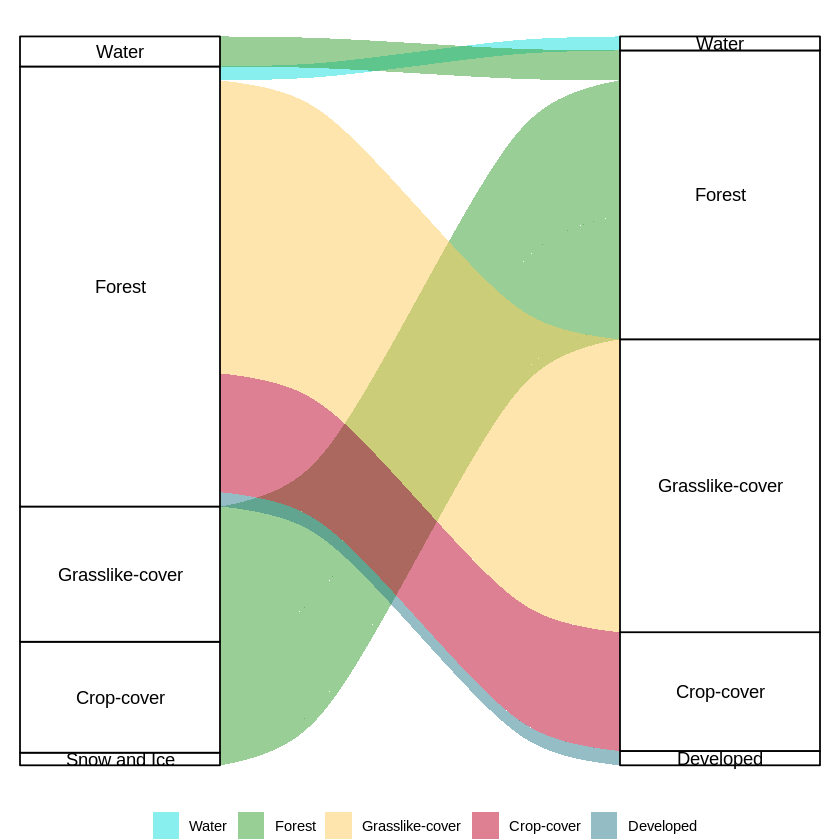

In [164]:
library(ggalluvial)
class_dt[!is.na(class_dt$y2017)][y2017!=y2023][,list(freq= sum(row)/nrow(class_dt)),by=.(y2017,y2023,pretty_class_y2017,pretty_class_y2023)][freq>0.0001] %>%

ggplot(data = .,
      aes(axis1 = pretty_class_y2017, axis2 = pretty_class_y2023, y = freq)) +
geom_alluvium(aes(fill = pretty_class_y2023)) +
scale_fill_manual(values = color_scale) +  # Using hex codes
geom_stratum() +
geom_text(stat = "stratum",
          aes(label = after_stat(stratum))) +
scale_x_discrete(limits = c("y2017", "y2023"),
                  expand = c(0.15, 0.05)) +
theme_void()+
theme(legend.position = "bottom") +  # Move legend to bottom
guides(color = guide_legend(title = NULL))  +
theme(legend.title = element_blank())  # Remove all legend titles


In [157]:
delta_overall_dt <- class_dt[!is.na(class_dt$y2023)][,list(count= sum(row) ),by=.(y2023,pretty_class_y2023,y2017,pretty_class_y2017)][,per:=count/sum(count)*100 ][,list(class_per = sum(per)),by = .(pretty_class_y2023 !=pretty_class_y2017 )]
delta_overall_dt

pretty_class_y2023,class_per
<lgl>,<dbl>
FALSE,93.3168480
TRUE,6.3832699
NA,0.2998821


In [165]:
# class_dt[!is.na(class_dt$y2018)][,list(count= sum(row) ),by=.(y2018,pretty_class_y2018)][,per:=(count/sum(count)*100) %>% round] %>% print

# class_dt[!is.na(class_dt$y2023)][,list(count= sum(row) ),by=.(y2023,pretty_class_y2023)][,per:=(count/sum(count)*100) %>% round] %>% print

class_dt[!is.na(class_dt$y2017)][y2017!=y2023][,list(freq= sum(row)/nrow(class_dt)),by=.(y2017,y2023,pretty_class_y2017,pretty_class_y2023)][freq>0.0001] %>% print

delta_dt <- class_dt[!is.na(class_dt$y2017)][y2017!=y2023][,list(freq= sum(row)/nrow(class_dt)),by=.(y2017,y2023,pretty_class_y2017,pretty_class_y2023)][freq>0.0001]

   y2017 y2023 pretty_class_y2017 pretty_class_y2023         freq
   <num> <num>             <fctr>             <fctr>        <num>
1:     2     1             Forest              Water 0.0001684821
2:     1     2              Water             Forest 0.0003621562
3:     2     3             Forest    Grasslike-cover 0.0035273891
4:     3     2    Grasslike-cover             Forest 0.0016285706
5:     2     7             Forest          Developed 0.0001726425
6:     9     2       Snow and Ice             Forest 0.0001515810
7:     5     2         Crop-cover             Forest 0.0013361638
8:     2     5             Forest         Crop-cover 0.0014303969


In [194]:
delta_dt

y2017,y2023,pretty_class_y2017,pretty_class_y2023,freq
<dbl>,<dbl>,<fct>,<fct>,<dbl>
2,1,Forest,Water,0.0001684821
1,2,Water,Forest,0.0003621562
2,3,Forest,Grasslike-cover,0.0035273891
3,2,Grasslike-cover,Forest,0.0016285706
2,7,Forest,Developed,0.0001726425
9,2,Snow and Ice,Forest,0.0001515810
5,2,Crop-cover,Forest,0.0013361638
2,5,Forest,Crop-cover,0.0014303969


In [204]:
x_dt

y2017,y2023,pretty_class_y2017,pretty_class_y2023,freq
<dbl>,<dbl>,<fct>,<fct>,<dbl>
2,1,Forest,Water,0.0001684821


In [206]:
limon_21_23_class_tif

class      : RasterLayer 
dimensions : 10545, 9505, 100230225  (nrow, ncol, ncell)
resolution : 8.983153e-05, 8.983153e-05  (x, y)
extent     : -83.92924, -83.07539, 9.990164, 10.93744  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : r_tmp_2024-02-08_022033.749405_6692_29130.grd 
names      : layer 
values     : 1, 9  (min, max)


In [199]:
y2017_state <- limon_15_17_class_tif == x_dt$y2017[[1]]
y2023_state <- limon_21_23_class_tif == x_dt$y2023[[1]]

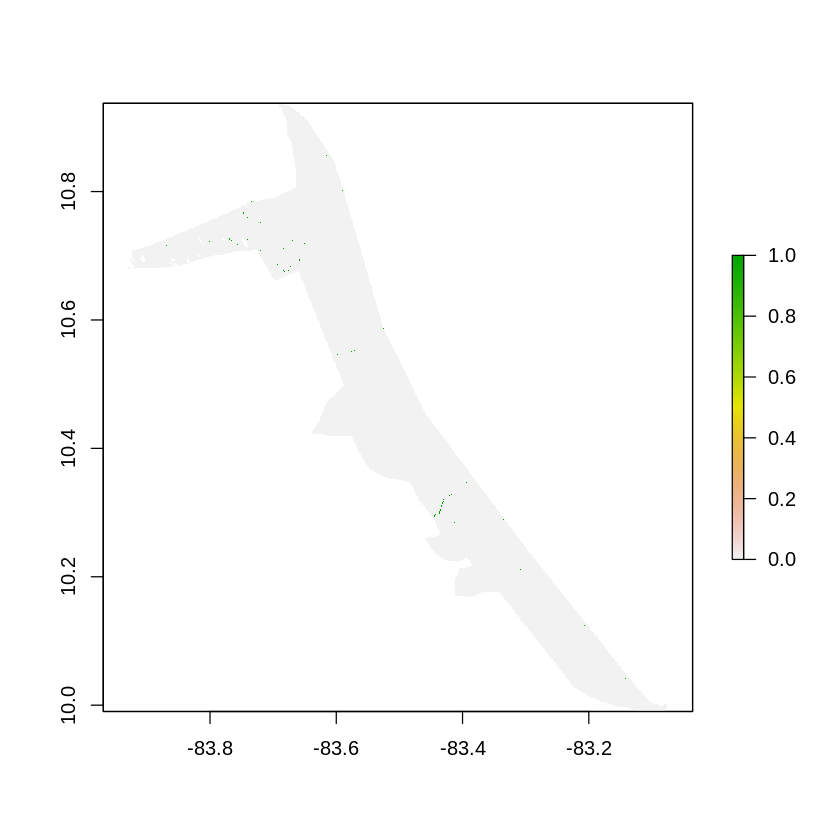

In [209]:
(y2017_state*y2023_state) %>% plot

In [210]:
summary_dt <-
1:nrow(delta_dt) %>% lapply(function(x){
x_dt <- delta_dt[x,]

y2017_state <- limon_15_17_class_tif == x_dt$y2017[[1]]
y2023_state <- limon_21_23_class_tif == x_dt$y2023[[1]]

delta_state = y2017_state*y2023_state

result_dt <- data.table(x= delta_state %>% exact_extract(grid %>% st_as_sf,fun='mean'))
names(result_dt) <- paste0(x_dt[['pretty_class_y2017']][1],'_',x_dt[['pretty_class_y2023']][1])
return(result_dt)}) %>% do.call(cbind,.)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [211]:
data.table(grid,summary_dt) %>% st_as_sf %>% st_write('/content/test_region.gpkg',delete_dsn = T)

Deleting source `/content/test_region.gpkg' using driver `GPKG'
Writing layer `test_region' to data source 
  `/content/test_region.gpkg' using driver `GPKG'
Writing 1332 features with 9 fields and geometry type Polygon.


In [212]:
summary_dt

Forest_Water,Water_Forest,Forest_Grasslike-cover,Grasslike-cover_Forest,Forest_Developed,Snow and Ice_Forest,Crop-cover_Forest,Forest_Crop-cover
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000e+00,0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000000,0.000000000,0.039025024,0.046750583,0.0000000000,0.0000000000,0.000000e+00,0
0.000000000,0.000000000,0.080512382,0.016498428,0.0000000000,0.0000000000,0.000000e+00,0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000000,0.000000000,0.047524597,0.018619088,0.0000000000,0.0058670454,0.000000e+00,0
0.000000000,0.000000000,0.243219569,0.091056228,0.0000000000,0.0000000000,0.000000e+00,0
0.000000000,0.000000000,0.125381410,0.073416777,0.0000000000,0.0000000000,0.000000e+00,0
0.000000000,0.000000000,0.090595387,0.026618401,0.0000000000,0.0346519016,7.562046e-05,0


In [176]:
grid_test <- grid

In [178]:
grid_test$`Forest_Grasslike-cover` <-

  |======================================================================| 100%


In [179]:
grid_test %>% st_write('/content/test_region.gpkg')

Writing layer `test_region' to data source 
  `/content/test_region.gpkg' using driver `GPKG'
Writing 1332 features with 2 fields and geometry type Polygon.
